# Working with larget example (multiclass classification)
## (Neural Network to classify images of different items of clothing)

When you have more than 2 classes, its known as **multiclass classification**.

And when you have only two classes, its knows as **binary classification**

To practice multiclass classification, we are going to build neural network to classify images of different items of clothing.




In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data() # load the data into train and test data



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training examples are:\n{train_data[0]}\n")
print(f"Training label are:\n{train_labels[0]}\n")

Training examples are:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

In [ ]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

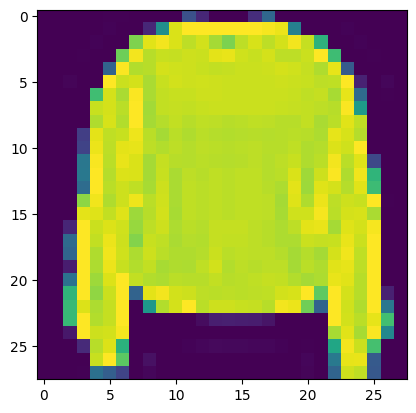

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check the training sample
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they are in human-readable form
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

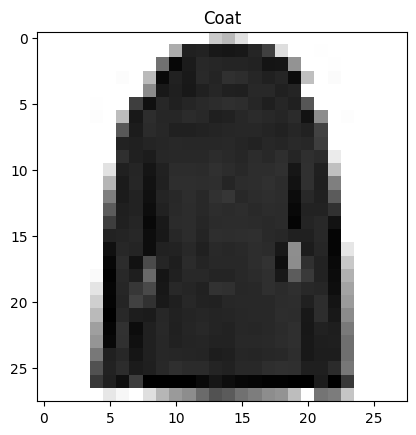

In [ ]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


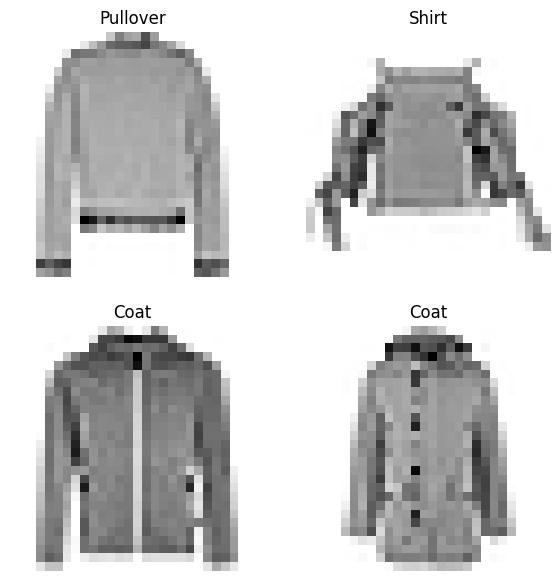

In [ ]:
# Plot multiple random images of FASHION MNIST
import random
plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary) # here cmap is adding greyscale to image
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a multi-class classification model

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however, we are going to have to tweak a few things:

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss = tf.keras.losses.CategoricalCrossentropy()
  * If you labels are one hot encoded use CategoricalCrossentropy()
  * If you labels are in integer form use SparseCategoricalCrossentropy()
* Output Layer activation = softmax not sigmoid



In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten your input shape data to avoid ValueError: Shapes (32,) and (32, 28, 10) are incompatible error
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Also to run the data we need to convert our labels into one-hot encoded (in the form of 0 or 1) to use Categorical else use Sparse (but now use Categorical)
# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # we can also fix this shape error by fixing Catogorical -> SparseCategorical
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10))) # validation data ensures the validity of the data with validated data, in this case we use test data

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5758 - accuracy: 0.1237 - val_loss: 2.2069 - val_accuracy: 0.1472
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0003 - accuracy: 0.1849 - val_loss: 1.7901 - val_accuracy: 0.2082
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7444 - accuracy: 0.2436 - val_loss: 1.7001 - val_accuracy: 0.3063
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6729 - accuracy: 0.2841 - val_loss: 1.6455 - val_accuracy: 0.3086
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6363 - accuracy: 0.2985 - val_loss: 1.6192 - val_accuracy: 0.3171
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6100 - accuracy: 0.3086 - val_loss: 1.6018 - val_accuracy: 0.3134
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6003 - accuracy: 0.3178 - val_loss: 1.5938 - val_accuracy:

In [ ]:
# To determine how muhc the accuracy hsould be for example if we have 10 labels then accuracy can be 100/10 = 10.0 so in our case above is 33 which is 3 times good
# But lets improve our model more
model_11.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 4)                 3140      
                                                                 
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max value of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1

In [ ]:
# We can get training and testing data between 0 & 1 by dividing by maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let build our model to find patterns in it

# Set seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels,  epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2340 - accuracy: 0.5389 - val_loss: 0.8201 - val_accuracy: 0.7348
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6807 - accuracy: 0.7670 - val_loss: 0.6405 - val_accuracy: 0.7672
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5976 - accuracy: 0.7849 - val_loss: 0.6120 - val_accuracy: 0.7761
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5676 - accuracy: 0.7922 - val_loss: 0.5850 - val_accuracy: 0.7856
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5520 - accuracy: 0.7971 - val_loss: 0.5915 - val_accuracy: 0.7844
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5405 - accuracy: 0.8010 - val_loss: 0.5713 - val_accuracy: 0.7897
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5330 - accuracy: 0.8042 - val_loss: 0.5876 - val_accuracy:

**Note** Neural Networks tend to prefer data in numerical form as well as scaled/normalized (numbers  between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

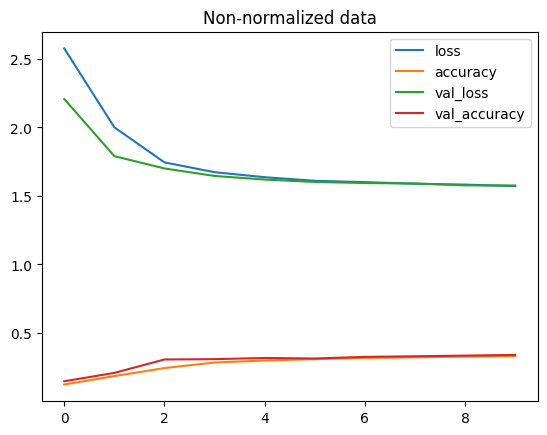

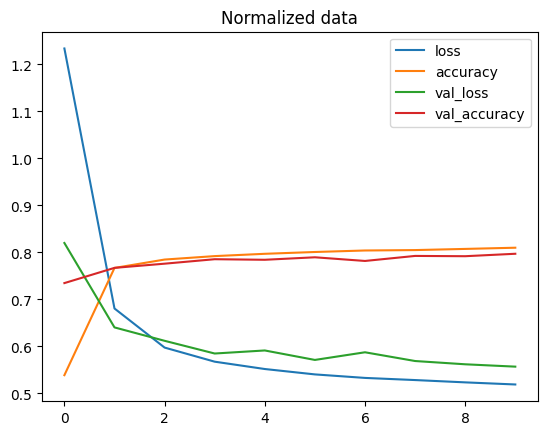

In [ ]:
# Let now compare the loss curves between normalized data and non-normalized dat model
import pandas as pd
# Plot the non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized loss data curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models its important tha tyou are comparing them on the same criteria.(e.g same architecture but different data or same data but different architecture)

# Find the Ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_schedular])


Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3826 - accuracy: 0.4331 - val_loss: 0.9649 - val_accuracy: 0.6767 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8526 - accuracy: 0.7179 - val_loss: 0.8173 - val_accuracy: 0.7323 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7510 - accuracy: 0.7426 - val_loss: 0.7489 - val_accuracy: 0.7242 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7087 - accuracy: 0.7520 - val_loss: 0.7233 - val_accuracy: 0.7344 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6870 - accuracy: 0.7577 - val_loss: 0.7052 - val_accuracy: 0.7565 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6650 - accuracy: 0.7633 - val_loss: 0.6943 - val_accuracy: 0.7625 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

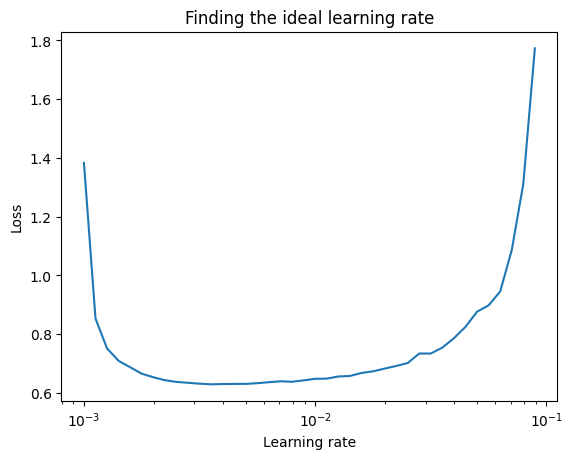

In [ ]:
# For finding ideal learning rate go to the lowest point and then go backwards slightly higher
# Plot the learning decay rate curve
import pandas as pd
import matplotlib.pyplot as plt


lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3

0.001

In [ ]:
# Lets refit he model with ideal learning rate
# Set seed

tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2070 - accuracy: 0.5299 - val_loss: 0.7820 - val_accuracy: 0.7162
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6875 - accuracy: 0.7555 - val_loss: 0.6763 - val_accuracy: 0.7635
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6222 - accuracy: 0.7825 - val_loss: 0.6267 - val_accuracy: 0.7836
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5898 - accuracy: 0.7939 - val_loss: 0.6038 - val_accuracy: 0.7917
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5710 - accuracy: 0.8002 - val_loss: 0.5963 - val_accuracy: 0.7939
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5594 - accuracy: 0.8044 - val_loss: 0.6024 - val_accuracy: 0.7898
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5502 - accuracy: 0.8079 - val_loss: 0.5762 - val_accuracy:

## Evaluating our multiclass classification model

To evaluate out multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions through visualization
* Improve its results (by training if for longer or changing the architecture)
* Save it and export it to use in our later applications

Lets go through the top two:

In [ ]:
# Create confusion matrix

# Note: the confusion matrix code we are about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools
from sklearn.metrics import confusion_matrix



def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the x-axis label to the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)



In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# make some predictions with our model

y_probs = model_14.predict(test_data_norm) #probs is short for prediction probablities

# View the first 5 predictions
y_probs[:5]



313/313 [==============================] - 1s 2ms/step


array([[6.2790670e-05, 1.5203950e-09, 8.6183576e-09, 2.6600986e-07,
        7.3169382e-10, 3.9049330e-01, 8.4850421e-07, 8.4842689e-02,
        3.2741250e-03, 5.2132601e-01],
       [4.3684524e-04, 8.0492391e-08, 9.3746454e-01, 7.3952422e-10,
        2.4448566e-02, 1.5177524e-24, 3.7026979e-02, 0.0000000e+00,
        6.2302290e-04, 1.5258336e-31],
       [3.7021977e-03, 9.9470317e-01, 8.7272935e-04, 4.2973325e-04,
        8.4933663e-07, 8.7476110e-07, 1.0272801e-04, 6.4152522e-07,
        5.6785352e-06, 1.8139048e-04],
       [5.0946656e-03, 9.9095297e-01, 1.4984756e-03, 1.5975204e-03,
        3.8905787e-06, 1.4688253e-05, 2.3038476e-04, 1.9812613e-05,
        1.5500091e-05, 5.7216879e-04],
       [1.1408823e-01, 1.3282665e-04, 3.0603129e-01, 1.2151984e-03,
        5.1778201e-02, 4.3644990e-15, 5.1030809e-01, 4.7171605e-26,
        1.6446136e-02, 2.7101155e-21]], dtype=float32)

**Note** Remember to make predictions on the same kind of data your model was trained on. In otu case it was **test_data_norm**

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.2790670e-05, 1.5203950e-09, 8.6183576e-09, 2.6600986e-07,
        7.3169382e-10, 3.9049330e-01, 8.4850421e-07, 8.4842689e-02,
        3.2741250e-03, 5.2132601e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all the prediction probablites into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Create confusion matrix completely
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[740,  10,  26,  68,   2,   1, 128,   0,  25,   0],
       [  3, 953,  13,  26,   1,   0,   3,   0,   1,   0],
       [ 19,   4, 748,   7, 153,   1,  56,   0,  12,   0],
       [ 31,  17,  10, 835,  33,   6,  60,   0,   8,   0],
       [  1,   1, 166,  21, 724,   0,  79,   0,   8,   0],
       [  0,   0,   0,   0,   0, 907,   0,  49,  12,  32],
       [138,   4, 160,  47, 178,   1, 442,   0,  30,   0],
       [  0,   0,   0,   0,   0,  44,   0, 920,   0,  36],
       [  3,   0,  11,   8,   5,  24,  12,   3, 933,   1],
       [  0,   0,   0,   0,   0,  21,   0,  38,   5, 936]])

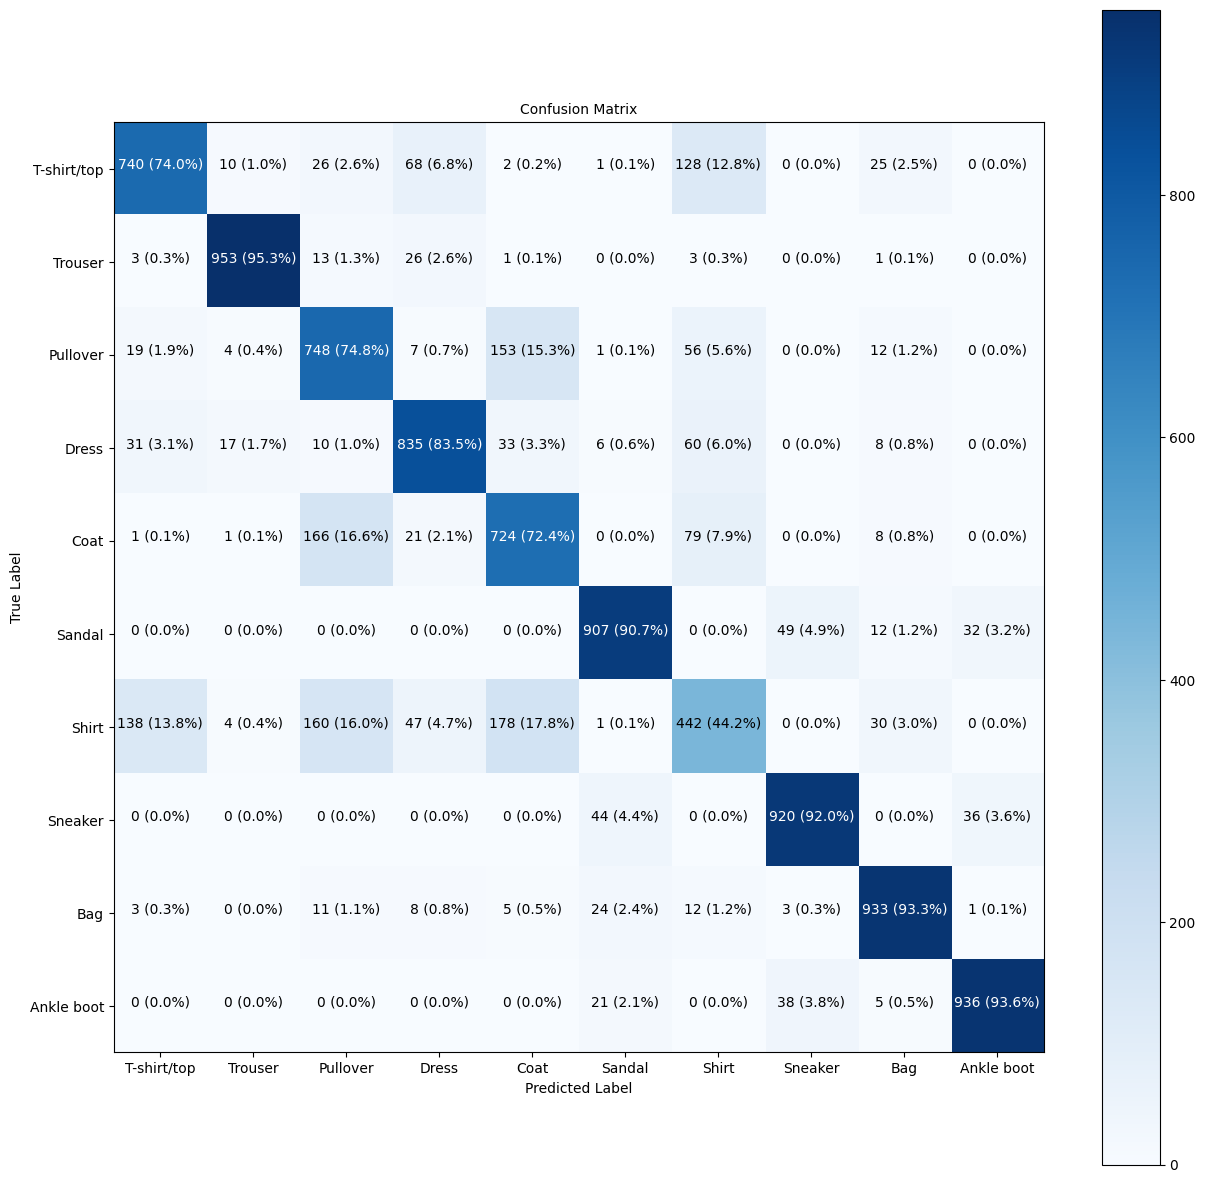

In [ ]:
# Now lets make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10
                      )

**Note** Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop a furthur understanding of the data and the inputs and the outputs of the model.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* We should label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and a truth label
  """
  # set up a random integer
  i = random.randint(0, len(images))

  # predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color="red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
             color=color) # set the color to green or red based on the prediction if its right or wrong

1/1 [==============================] - 0s 24ms/step


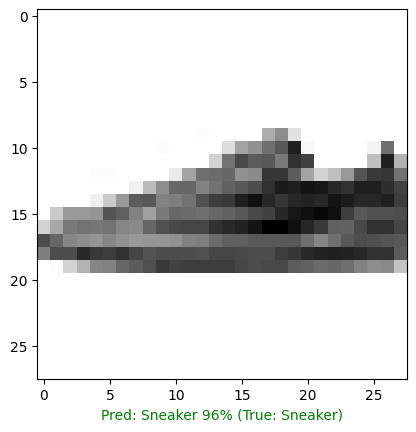

In [ ]:
#Check out the random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, #always makes predictions on the same kind on which yor data was trained on
                  true_labels=test_labels,
                  classes=class_names)

# What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# get the patterns of the layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.28277966,  0.03703313,  0.9509366 , -0.9999839 ],
        [-1.1384531 ,  0.6796435 , -1.1381444 , -0.13989905],
        [-0.0527482 ,  0.56503975, -0.00604701, -1.3086609 ],
        ...,
        [ 0.12899046, -0.399088  , -0.66805655, -0.04132183],
        [-0.06170164, -0.36676288, -0.3792403 , -0.54967684],
        [ 0.02840047,  0.35481414,  0.42446667, -0.9176188 ]],
       dtype=float32),
 (784, 4))

# Now lets check out the bias vector


In [ ]:
biases, biases.shape

(array([0.36931422, 0.32838514, 0.61174256, 0.6093308 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector also gets initialized as zeros, at least in the case of tensorflow dense layer

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [ ]:
model_14.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 4)                 3140      
                                                                 
 dense_60 (Dense)            (None, 4)                 20        
                                                                 
 dense_61 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


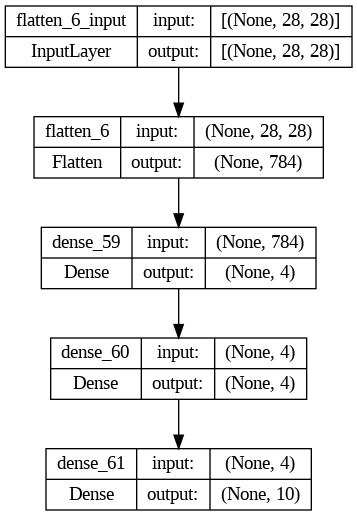

In [ ]:
# Lets check out another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model

# see the inputs and outputs
plot_model(model_14, show_shapes=True)